<a href="https://colab.research.google.com/github/NguyenThiHongLinh/ML2023/blob/main/Nhom2_Seminar_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# tải dữ liệu
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/Seminar'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/138PXcr0PqRuJDuvC_5IIh34gxk-xYBTU/Seminar


In [47]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes)

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)

Missing Attribute Values:
- BI-RADS assessment: 2
- Age: 5
- Shape: 31
- Margin: 48
- Density: 76
- Severity: 0

In [48]:
# BI-RADS: this is not a "predictive" attribute => discard it
data = pd.read_csv("mammographic_masses.csv", na_values='?',names =['BI-RADS','Age','Shape','Margin','Density','Severity'],usecols =['Age','Shape','Margin','Density','Severity'])
data

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...
956,47.0,2.0,1.0,3.0,0
957,56.0,4.0,5.0,3.0,1
958,64.0,4.0,5.0,3.0,0
959,66.0,4.0,5.0,3.0,1


In [49]:
#kiểm tra dữ liệu bị thiếu
data.isnull().sum()

Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [50]:
#fill in dữ liệu bị thiếu
imputer = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
imputer.fit(data)


SimpleImputer(strategy='most_frequent')

In [51]:
#what data has fit in my data
imputer.statistics_

array([59.,  4.,  1.,  3.,  0.])

In [52]:
#impute into dataset
data = imputer.transform(data)

In [53]:
data = pd.DataFrame(data)
# thống kê các thuộc tính của dữ liệu
data.describe(include=("all"))

,0,1,2,3,4
count,961.000000,961.000000,961.000000,961.000000,961.000000
mean,55.505723,2.762747,2.706556,2.917794,0.463059
std,14.444586,1.243276,1.576272,0.365869,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [54]:
data.isnull().mean()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

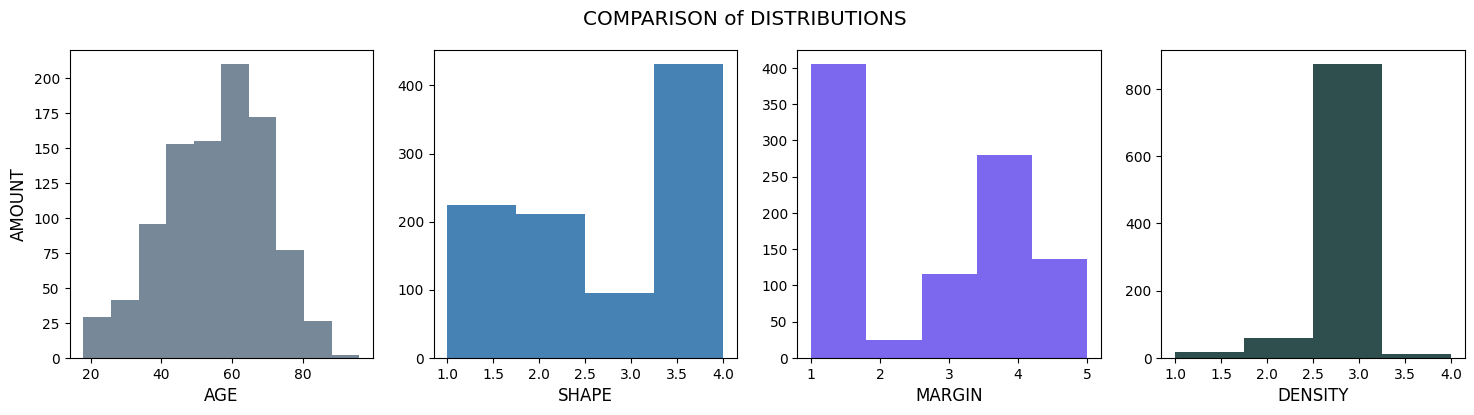

In [55]:
#Biểu đồ biểu diễn phân bố dữ liệu
fig, axes = plt.subplots(1,4, sharey=False, figsize=(18,4))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.hist(data[0], bins=10, color="lightslategray")
ax2.hist(data[1], bins=4, color="steelblue")
ax3.hist(data[2], bins=5, color="mediumslateblue")
ax4.hist(data[3], bins=4, color="darkslategray")
ax1.set_xlabel('AGE', fontsize="large")
ax2.set_xlabel('SHAPE', fontsize="large")
ax3.set_xlabel('MARGIN', fontsize="large")
ax4.set_xlabel('DENSITY', fontsize="large")
ax1.set_ylabel("AMOUNT", fontsize="large")

plt.suptitle('COMPARISON of DISTRIBUTIONS', ha='center', fontsize='x-large')
plt.show()

In [56]:
features = list(data.columns[:4])
print(features)
labels = list(data.columns[4:])
print(labels)

[0, 1, 2, 3]
[4]


In [57]:
X = data[features].values
y = data[labels].values
y = y.ravel()

In [58]:
# normalize data
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
X

array([[ 0.79616418,  0.19092812,  1.45573748,  0.22480407],
       [-0.86622317, -1.41856247, -1.08321663,  0.22480407],
       [ 0.17276892,  0.99567342,  1.45573748,  0.22480407],
       ...,
       [ 0.58836576,  0.99567342,  1.45573748,  0.22480407],
       [ 0.72689804,  0.99567342,  1.45573748,  0.22480407],
       [ 0.44983348,  0.19092812,  0.18626042,  0.22480407]])

In [59]:
# SVM
#1. LINEAR KERNEL
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

#2. POLY KERNEL
clf = svm.SVC(kernel='poly') 
clf.fit(X_train, y_train)
y_pred_svm_1 = clf.predict(X_test)

accuracy_svm_1 = accuracy_score(y_test, y_pred_svm_1)
precision_svm_1 = precision_score(y_test, y_pred_svm_1, average='macro')
recall_svm_1 = recall_score(y_test, y_pred_svm_1, average='macro')
f1_svm_1 = f1_score(y_test, y_pred_svm_1, average='macro')

#3. RBF KERNEL
clf = svm.SVC(kernel='rbf') 
clf.fit(X_train, y_train)
y_pred_svm_r = clf.predict(X_test)

accuracy_svm_r = accuracy_score(y_test, y_pred_svm_r)
precision_svm_r = precision_score(y_test, y_pred_svm_r, average='macro')
recall_svm_r = recall_score(y_test, y_pred_svm_r, average='macro')
f1_svm_r = f1_score(y_test, y_pred_svm_r, average='macro')


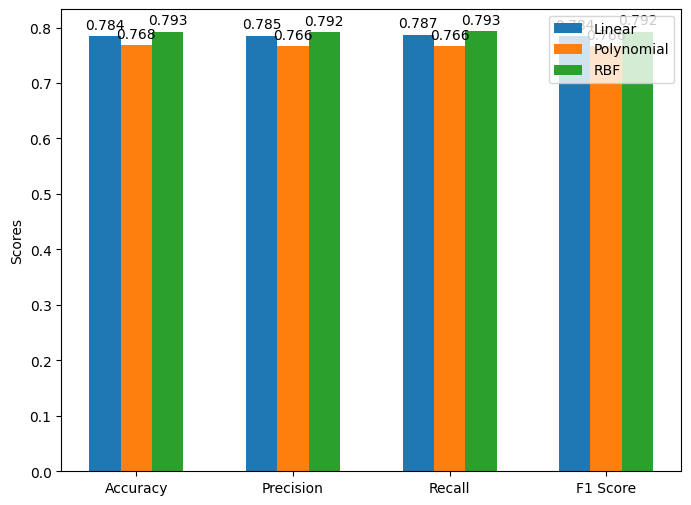

Accuracy kernel :  0.7842323651452282
Accuracy polynomial :  0.7676348547717843
Accuracy RBF :  0.7925311203319502


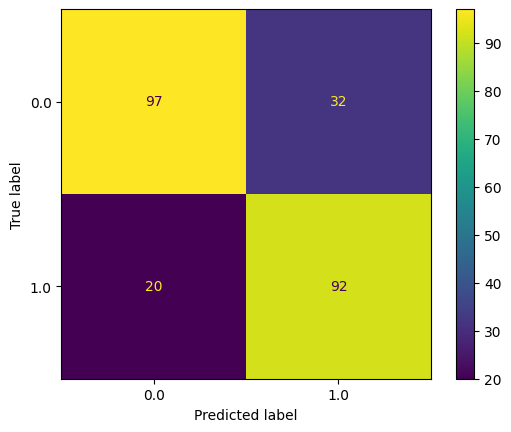

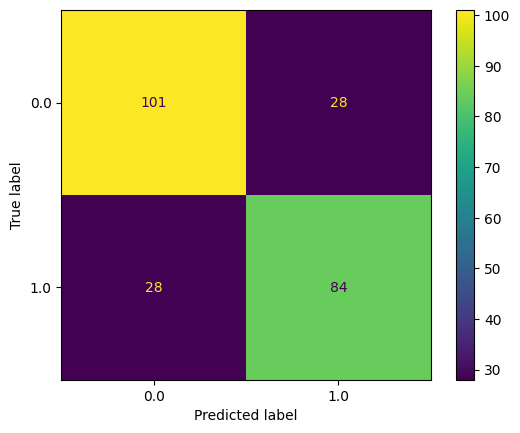

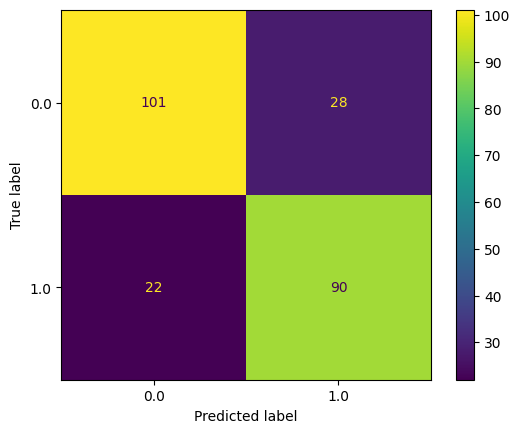

In [60]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
linear_scores = [accuracy_svm, precision_svm, recall_svm, f1_svm]
poly_scores = [accuracy_svm_1, precision_svm_1, recall_svm_1, f1_svm_1]
rbf_scores = [accuracy_svm_r, precision_svm_r, recall_svm_r, f1_svm_r]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, linear_scores, width, label='Linear')
rects2 = ax.bar(x, poly_scores, width, label='Polynomial')
rects3 = ax.bar(x + width, rbf_scores, width, label='RBF')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

from sklearn.metrics import accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay
print ("Accuracy kernel : ", accuracy_svm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

print ("Accuracy polynomial : ", accuracy_svm_1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_1)

print ("Accuracy RBF : ", accuracy_svm_r)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_r)

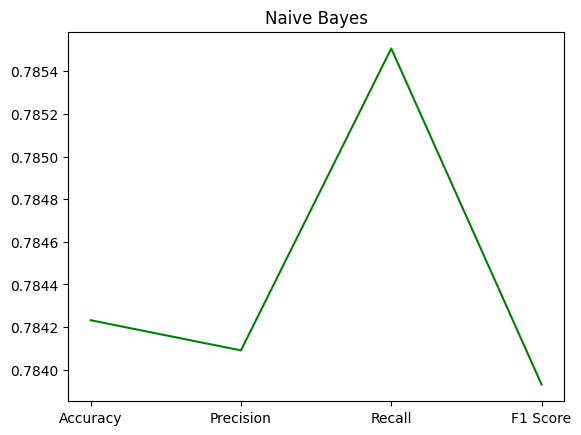

Accuracy :  0.7842323651452282


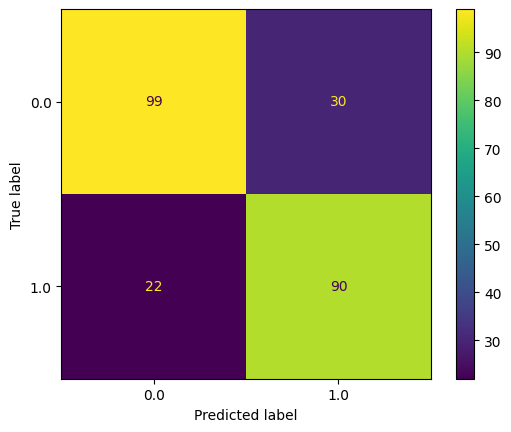

In [61]:
# NAIVE BAYES
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')


#Create data for plotting
values = [accuracy_nb, precision_nb, recall_nb, f1_nb]
names = ["Accuracy", "Precision", "Recall", "F1 Score"]
plt.plot(names, values, color="green")
plt.title("Naive Bayes")
plt.show()

print ("Accuracy : ", accuracy_nb)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)

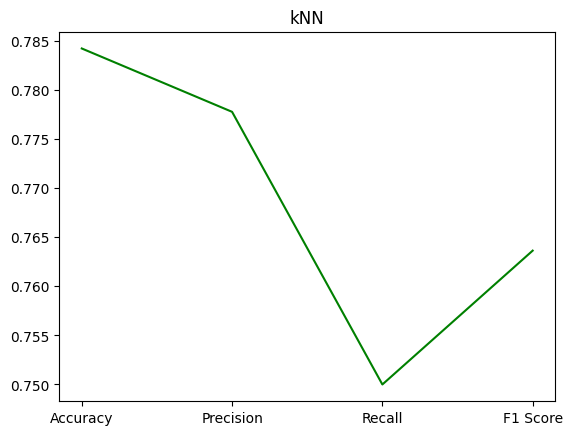

Accuracy :  0.7842323651452282


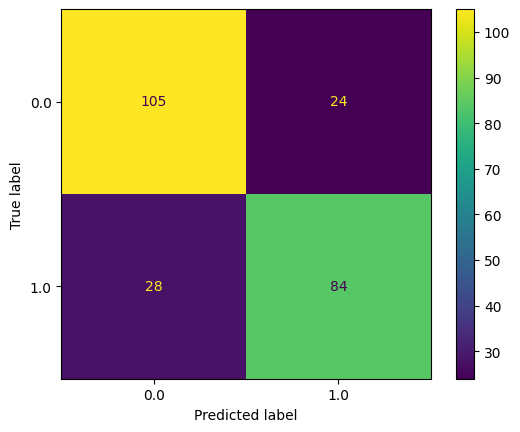

In [63]:
#kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn= knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

#Create data for plotting
values = [accuracy_knn, precision_knn, recall_knn, f1_knn]
names = ["Accuracy", "Precision", "Recall", "F1 Score"]
plt.plot(names, values, color="green")
plt.title("kNN")
plt.show()

print ("Accuracy : ", accuracy_knn)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)


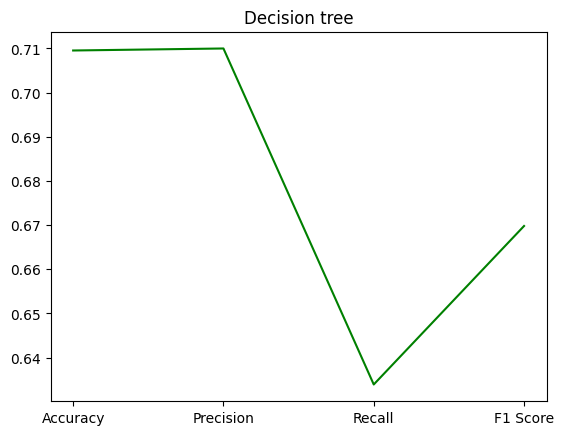

Accuracy :  0.7095435684647303


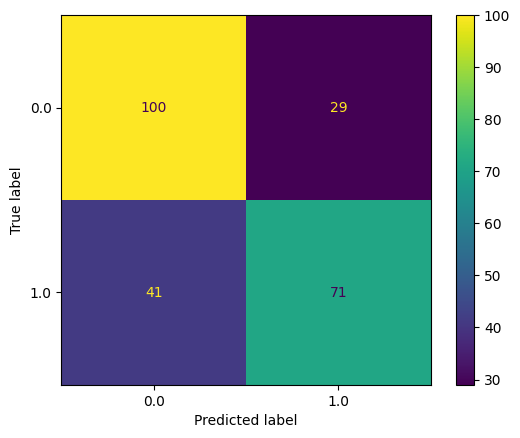

In [64]:
#Decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred_tree = clf.predict(X_test)
clf.score(X_test, y_test)

acc_tree=accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

#Create data for plotting
values = [acc_tree, precision_tree, recall_tree, f1_tree]
names = ["Accuracy", "Precision", "Recall", "F1 Score"]
plt.plot(names, values, color="green")
plt.title("Decision tree")
plt.show()

print ("Accuracy : ", acc_tree)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)

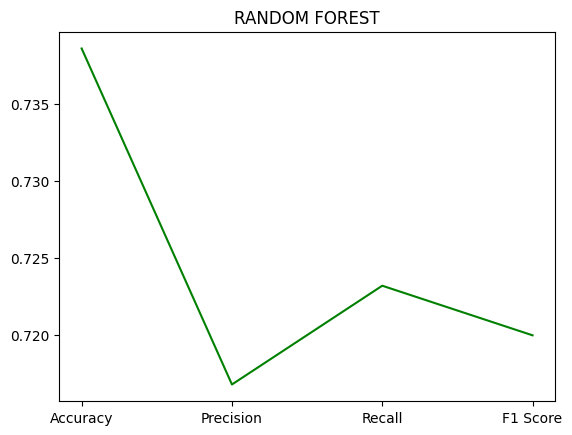

Accuracy :  0.7385892116182573


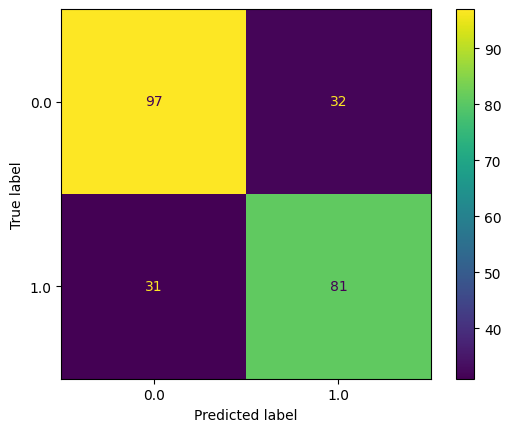

In [65]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train,y_train)
y_pred_rd = clf.predict(X_test)
clf.score(X_test, y_test)
# scores = model_selection.cross_val_score(clf,X,y,cv=10)
# print(scores)
# print(scores.mean())

acc_rd=accuracy_score(y_test, y_pred_rd)
precision_rd = precision_score(y_test, y_pred_rd)
recall_rd = recall_score(y_test, y_pred_rd)
f1_rd = f1_score(y_test, y_pred_rd)

#Create data for plotting
values = [acc_rd, precision_rd, recall_rd, f1_rd]
names = ["Accuracy", "Precision", "Recall", "F1 Score"]
plt.plot(names, values, color="green")
plt.title("RANDOM FOREST")
plt.show()

print ("Accuracy : ", acc_rd)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rd)

In [66]:
#Neural network
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [67]:
model = Sequential()
model.add(Dense(64,input_dim=4,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=2)

Epoch 1/100
72/72 - 1s - loss: 0.6821 - accuracy: 0.7208 - 803ms/epoch - 11ms/step
Epoch 2/100
72/72 - 0s - loss: 0.5446 - accuracy: 0.7986 - 108ms/epoch - 1ms/step
Epoch 3/100
72/72 - 0s - loss: 0.4655 - accuracy: 0.8014 - 116ms/epoch - 2ms/step
Epoch 4/100
72/72 - 0s - loss: 0.4604 - accuracy: 0.8014 - 124ms/epoch - 2ms/step
Epoch 5/100
72/72 - 0s - loss: 0.4579 - accuracy: 0.8000 - 107ms/epoch - 1ms/step
Epoch 6/100
72/72 - 0s - loss: 0.4638 - accuracy: 0.8028 - 107ms/epoch - 1ms/step
Epoch 7/100
72/72 - 0s - loss: 0.4572 - accuracy: 0.8014 - 126ms/epoch - 2ms/step
Epoch 8/100
72/72 - 0s - loss: 0.4599 - accuracy: 0.8042 - 145ms/epoch - 2ms/step
Epoch 9/100
72/72 - 0s - loss: 0.4570 - accuracy: 0.8014 - 122ms/epoch - 2ms/step
Epoch 10/100
72/72 - 0s - loss: 0.4491 - accuracy: 0.8042 - 117ms/epoch - 2ms/step
Epoch 11/100
72/72 - 0s - loss: 0.4523 - accuracy: 0.7986 - 113ms/epoch - 2ms/step
Epoch 12/100
72/72 - 0s - loss: 0.4577 - accuracy: 0.8056 - 141ms/epoch - 2ms/step
Epoch 13/100

Test loss: 0.5241386294364929
Test accuracy: 0.7800830006599426
8/8 [==============================] - 0s 3ms/step
Accuracy: 0.535270
Precision: 0.267635
Recall: 0.500000
F1 score: 0.348649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


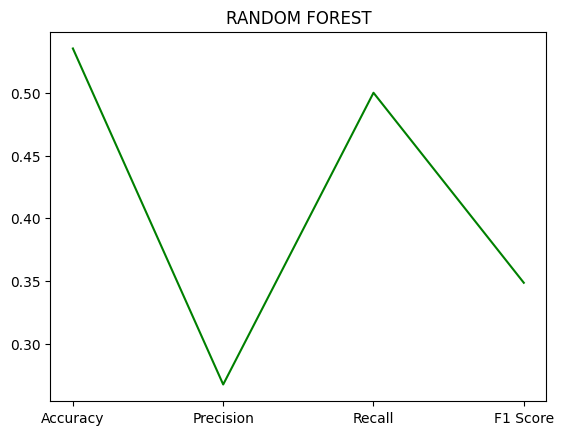

Accuracy :  0.5352697095435685


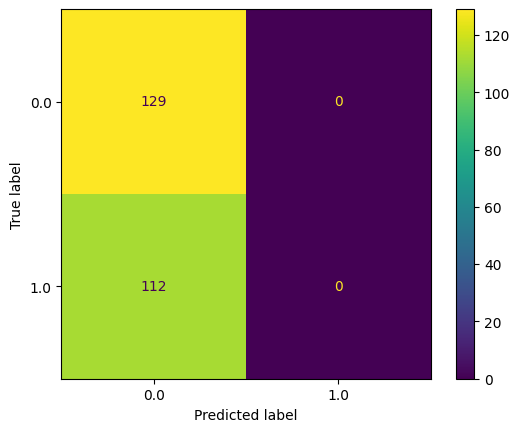

In [68]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_hat = model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

values = [accuracy, precision, recall, f1]
names = ["Accuracy", "Precision", "Recall", "F1 Score"]
plt.plot(names, values, color="green")
plt.title("RANDOM FOREST")
plt.show()

print ("Accuracy : ", accuracy)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [69]:
t= PrettyTable(['','acc','pre','recall','f1'])

t.add_row(['SVM_LINEAR KERNEL', round(accuracy_svm,4),round(precision_svm,4),round(recall_svm,4),round(f1_svm,4)])
t.add_row(['SVM_POLY KERNEL', round(accuracy_svm_1,4),round(precision_svm_1,4),round(recall_svm_1,4),round(f1_svm_1,4)])
t.add_row(['SVM_RBF KERNEL', round(accuracy_svm_r,4),round(precision_svm_r,4),round(recall_svm_r,4),round(f1_svm_r,4)])
t.add_row(['NAIVE BAYES', round(accuracy_nb,4),round(precision_nb,4),round(recall_nb,4),round(f1_nb,4)])
t.add_row(['KNN', round(accuracy_knn,4),round(precision_knn,4),round(recall_knn,4),round(f1_knn,4)])
t.add_row(['Decision tree', round(acc_tree,4),round(precision_tree,4),round(recall_tree,4),round(f1_tree,4)])
t.add_row(['Randomforest', round(acc_rd,4),round(precision_rd,4),round(recall_rd,4),round(f1_rd,4)])
t.add_row(['Neural Network', round(accuracy,4),round(precision,4),round(recall,4),round(f1,4)])


print(t)

+-------------------+--------+--------+--------+--------+
|                   |  acc   |  pre   | recall |   f1   |
+-------------------+--------+--------+--------+--------+
| SVM_LINEAR KERNEL | 0.7842 | 0.7855 | 0.7867 | 0.7841 |
|  SVM_POLY KERNEL  | 0.7676 | 0.7665 | 0.7665 | 0.7665 |
|   SVM_RBF KERNEL  | 0.7925 | 0.7919 | 0.7933 | 0.7921 |
|    NAIVE BAYES    | 0.7842 | 0.7841 | 0.7855 | 0.7839 |
|        KNN        | 0.7842 | 0.7778 |  0.75  | 0.7636 |
|   Decision tree   | 0.7095 |  0.71  | 0.6339 | 0.6698 |
|    Randomforest   | 0.7386 | 0.7168 | 0.7232 |  0.72  |
|   Neural Network  | 0.5353 | 0.2676 |  0.5   | 0.3486 |
+-------------------+--------+--------+--------+--------+


So sánh kết quả của các thuật toán

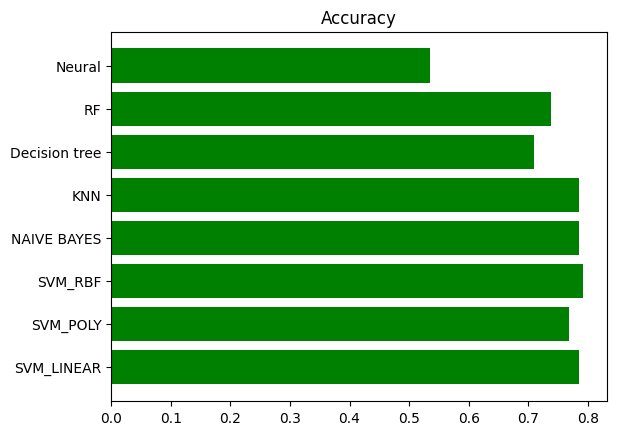

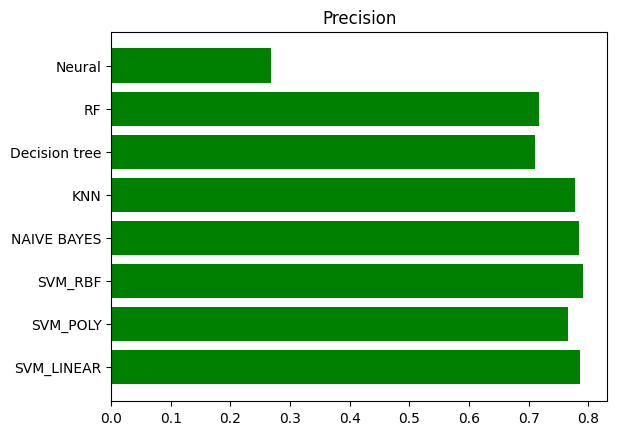

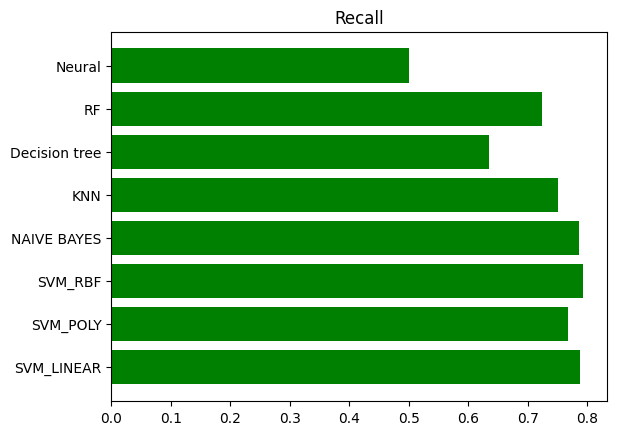

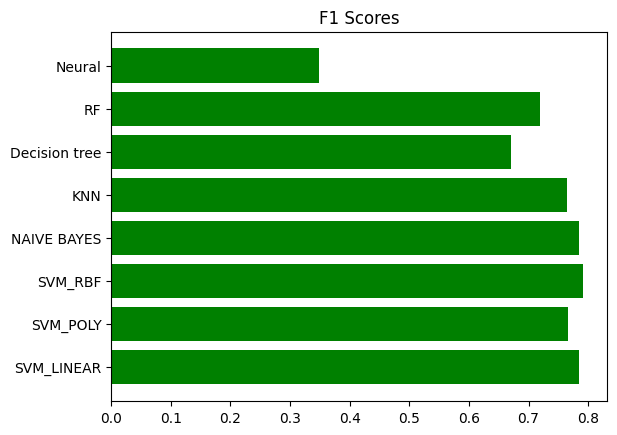

In [70]:
# ACCURACY
values = [accuracy_svm,accuracy_svm_1,accuracy_svm_r, accuracy_nb, accuracy_knn, acc_tree,acc_rd, accuracy]
names = ["SVM_LINEAR","SVM_POLY","SVM_RBF", "NAIVE BAYES", "KNN", "Decision tree","RF","Neural"]
plt.barh(names, values, color="green")
plt.title("Accuracy")
plt.show()

# PRECISION
values = [precision_svm,precision_svm_1,precision_svm_r, precision_nb, precision_knn, precision_tree,precision_rd, precision]
names = ["SVM_LINEAR","SVM_POLY","SVM_RBF", "NAIVE BAYES", "KNN", "Decision tree","RF","Neural"]
plt.barh(names, values, color="green")
plt.title("Precision")
plt.show()

# RECALL
values = [recall_svm,recall_svm_1,recall_svm_r, recall_nb, recall_knn, recall_tree,recall_rd, recall]
names = ["SVM_LINEAR","SVM_POLY","SVM_RBF", "NAIVE BAYES", "KNN", "Decision tree","RF","Neural"]
plt.barh(names, values, color="green")
plt.title("Recall")
plt.show()

# F1 SCORES
values = [f1_svm,f1_svm_1,f1_svm_r, f1_nb, f1_knn, f1_tree,f1_rd, f1]
names = ["SVM_LINEAR","SVM_POLY","SVM_RBF", "NAIVE BAYES", "KNN", "Decision tree","RF","Neural"]
plt.barh(names, values, color="green")
plt.title("F1 Scores")
plt.show()
